In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from network.model import *

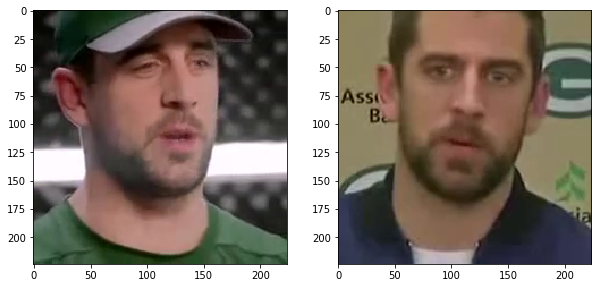

In [3]:
G = Generator(224)
E = Embedder(224)
D = Discriminator(36237)
optimizerG = optim.Adam(params = list(E.parameters()) + list(G.parameters()), lr=5e-5)
optimizerD = optim.Adam(params = D.parameters(), lr=2e-4)

path_to_chkpt = '../model_weights.tar'
cpu = torch.device("cpu")

checkpoint = torch.load(path_to_chkpt, map_location=cpu)
E.load_state_dict(checkpoint['E_state_dict'])
G.load_state_dict(checkpoint['G_state_dict'])
D.load_state_dict(checkpoint['D_state_dict'])
optimizerG.load_state_dict(checkpoint['optimizerG_state_dict'])
optimizerD.load_state_dict(checkpoint['optimizerD_state_dict'])
epochCurrent = checkpoint['epoch']
lossesG = checkpoint['lossesG']
lossesD = checkpoint['lossesD']
num_vid = checkpoint['num_vid']
i_batch_current = checkpoint['i_batch'] +1

data1 = pkl.load(open("../data/id00017_01dfn2spqyE_00001.vid", 'rb'))
data2 = pkl.load(open("../data/id00017_5MkXgwdrmJw_00002.vid", 'rb'))

fig, ax = plt.subplots(1, 2, figsize = (10, 20))
ax[0].imshow(data1[0]['frame'])
ax[1].imshow(data2[0]['frame'])

# The data saved in .vid is in the order of [H, W, C]
# while the model nee input of [C, W, H]
data_frame1 = np.stack([data['frame'] for data in data1], axis=0).transpose(0,3,2,1)
data_frame2 = np.stack([data['frame'] for data in data2], axis=0).transpose(0,3,2,1)
data_landmark1 = np.stack([data['landmarks'] for data in data1], axis=0).transpose(0,3,2,1)
data_landmark2 = np.stack([data['landmarks'] for data in data2], axis=0).transpose(0,3,2,1)

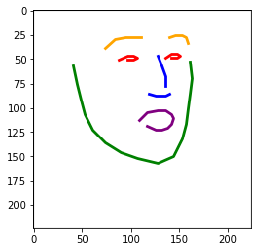

In [6]:
data_frame = torch.Tensor(np.stack([data_frame1, data_frame2], axis=0).reshape(-1, 3, 224, 224))
data_landmark = torch.Tensor(np.stack([data_landmark1, data_landmark2], axis=0).reshape(-1, 3, 224, 224))
plt.imshow(data_landmark[0, :3].permute(2, 1, 0)/255)

In [8]:
# print(data_frame.dtype)
# embed_vector = E(data_frame, data_landmark)
# mean_vector = embed_vector.view(2, -1, 512, 1).mean(dim=1)
# torch.save(mean_vector, "mean_vector.data")

mean_vector = torch.load("../mean_vector.data")

In [9]:
print(mean_vector.shape)

torch.Size([2, 512, 1])


In [53]:
generated_img_batch1 = []
for i in range(0, 8, 2):
    target_landmark = torch.Tensor(np.stack([data_landmark1[i], data_landmark1[i]], axis=0))
    generated_img = G(target_landmark, mean_vector)
    generated_img_batch1.append(generated_img)

In [74]:
torch.save(generated_img_batch1, "generated_img_batch1")

<Figure size 432x288 with 0 Axes>

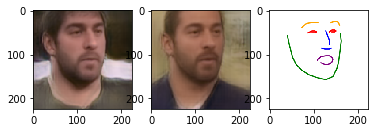

<Figure size 432x288 with 0 Axes>

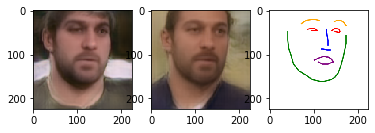

<Figure size 432x288 with 0 Axes>

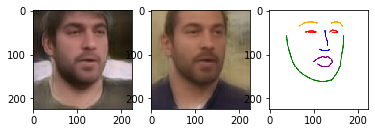

<Figure size 432x288 with 0 Axes>

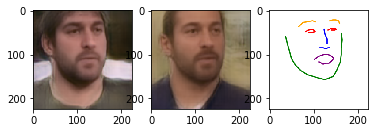

In [72]:
for i in range(0, 8, 2):
    plt.figure(i)
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(generated_img_batch1[i//2][0].detach().numpy().transpose(2, 1, 0)/255)
    ax[1].imshow(generated_img_batch1[i//2][1].detach().numpy().transpose(2, 1, 0)/255)
    ax[2].imshow(data_landmark1[i].transpose(2, 1, 0))

In [10]:
generated_img_batch2 = []
for i in range(0, 8, 2):
    target_landmark = torch.Tensor(np.stack([data_landmark2[i], data_landmark2[i]], axis=0))
    generated_img = G(target_landmark, mean_vector)
    generated_img_batch2.append(generated_img)

<Figure size 432x288 with 0 Axes>

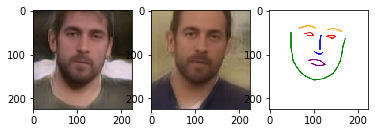

<Figure size 432x288 with 0 Axes>

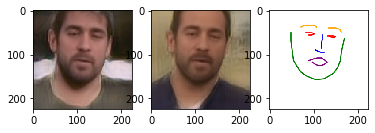

<Figure size 432x288 with 0 Axes>

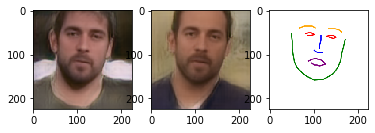

<Figure size 432x288 with 0 Axes>

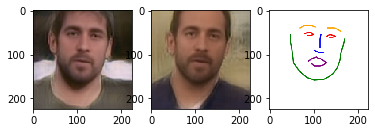

In [11]:
for i in range(0, 8, 2):
    plt.figure(i)
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(generated_img_batch2[i//2][0].detach().numpy().transpose(2, 1, 0)/255)
    ax[1].imshow(generated_img_batch2[i//2][1].detach().numpy().transpose(2, 1, 0)/255)
    ax[2].imshow(data_landmark2[i].transpose(2, 1, 0))

In [12]:
torch.save(generated_img_batch2, "generated_img_batch2")